In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams['font.sans-serif']=['Microsoft Yahei']
plt.style.use("seaborn-talk")

<div class="jumbotron">
    <h1 class="display-1">聚类技术</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

<p class="h3">客户关系管理的目标是什么？</p>

- 有的放矢，生成可控的目标客户群

- 量体裁衣，制定有针对性的营销计划

- 识别战略焦点与业务发展方向

> 核心是将客户进行**分群**管理

- 例：电信客户营销

群组|群组特征|营销策略
---|---|---
1|深夜通话<br>多发短信<br>多与预付费客户通话<br>避免忙时通话|夜间通话套餐，短信礼包，转为预付费，激励通话量
2|多发短信<br>多与预付费用户通话<br>避免忙时通话|闲时通话套餐,短信礼包，激励通话量
3|高通话量<br>多与网外用户通话<br>有国际长途|激励国际长途电话，高端资费方案
4|交往圈固定<br>多与后付费用户通话|高价值客户礼包，业务引荐奖励
5|高通话量<br>多与网外用户通话|激励话音用量
6|固网通话多<br>高通话量<br>喜欢早晨通话|移动-固网通话套餐，晨间通话套餐
7|多发短信<br>忙时通话多|短信激励，忙时通话套餐
8|高通话量<br>喜欢深夜通话<br>闲时通话多|夜间通话套餐，闲时通话套餐


- 分组的目标：拥有相似特征的客户位于同一组内，而具有不同特征的客户分配在不同组

> 需要**聚类分析（clustering analysis）**技术

- 聚类分析的应用
    + 客户关系管理
    + 项目管理种实现对项目的分组管理
    + 网页搜索将返回的结果分成不同的类别
    + 医学中用于识别疾病之间的关联
    + 图像识别中用于识别不同的手写体
    + 识别异常点（outlier detection）

## 基本概念

### 聚类分析定义

<dl class="row alert-info">
    <dt class="col-md-2">聚类</dt>
    <dd class="col-md-10">是一种将特征相似的样本聚集到一起，从而达到区分具有不同特征的样本的目的无监督的算法</dd>
</dl>

- 不需要事先知道类别信息

- 聚类形成的每一个组，被称为**簇（cluster）**

- 聚类的目标：簇内的样本之间尽可能相似，不同簇的样本尽可能不同

<img src="./img/clustering/clustering.png" width=50%>

### 聚类类型

##### 划分聚类（paritional clustering）

- 将数据对象集划分成**不重叠**的子集（簇），使得每个数据对象**恰**在一个簇中

<img src="./img/clustering/partition.png" width=70%>

##### 层次聚类（hierarchical clustering）

- 嵌套簇的集族，形成一个树形结构

<img src="./img/clustering/hierarchical.png" width=70%>

- 树的每个节点（簇）都是子簇的**并**，而树根是包含所有对象的簇

### 聚类分析方法

- $K$均值（$K$-means）
    + 基于划分的聚类，发现指定个数（$K$）的簇
    + 样本之间的相似性通过**距离**反映
    + 簇之间彼此**互斥**，即每个样本**只能**分属于一个簇

- 层次聚类（hierarchical clustering）：对数据进行层次化（hierarchical）分解
    + 凝聚的层次聚类（agglomerative hierarchical clustering）：“自底向上”的方式，从每个样本开始逐步向上合并
    + 分裂的层次聚类（divisive hierarchical clustering）：“自顶向下”的方式，从所有样本属于一个初始簇开始，不断划分子簇

- 基于密度的方法（density-based methods）
    + 不同于$K$均值方法通过**距离**划分簇，通过**密度**划分簇
    + 只要某一个簇周边的数据点（样本点）密度超过阈值，就一直增加该簇

## K均值

- 基本思想：利用样本之间的距离衡量样本之间的相似性，用一组样本的质心（该组样本的均值）作为簇的中心，找到紧凑且独立的簇

### 基本算法

<center><img src='./img/clustering/kmago.svg' width=40%></center>

##### $K$均值聚类过程示例

<center><img src="./img/clustering/kmeansProcess.gif" width=60%></center>

#### 距离的度量

- 欧式空间：欧几里得距离，$n$维空间中两个点$\boldsymbol{x}$和$\boldsymbol{y}$之间的欧几里得距离是:
$$
d(\boldsymbol{x}, \boldsymbol{y}) = \sqrt{\sum_{k=1}^n(x_k-y_k)^2}
$$

#### 目标函数

> 通过设定**目标函数**，重新计算每个簇的质心

- 目标函数为每个点到最近质心的欧几里得距离的**误差平方和**（sum of the squared error, SSE）最小

$$
\begin{split}
SSE &= \sum_{i=1}^K\sum_{\boldsymbol{x}\in C_i}d(\boldsymbol{c}_i, \boldsymbol{x})^2\\
\boldsymbol{c}_i&=\frac{1}{m_i}\sum_{\boldsymbol{x}\in C_i}\boldsymbol{x}
\end{split}
$$
其中，$\boldsymbol{x}$是数据点，$C_i$是第$i$个簇，$c_i$是第$i$个簇的质心，$m_i$是第$i$个簇包含的数据点的个数，$K$是簇的个数

- 簇内的误差平方和（SSE）也被称作cluster inertia

#### 初始质心

- 随机选择$K$个样本作为初始质心

- 初始质心的选择对聚类结果有显著影响

<p class="h3">恰当的初始质心</p>
<center><img src="./img/clustering/kmeansProcess.gif" width=60%></center>

<p class="h3">错误的初始质心</p>
<center><img src="./img/clustering/kmeansInitialCentroid.gif" width=60%></center>

##### 改进初始质心的选择

<p class="h3">$K$-means++方法初始化质心</p>

- 顺次选择$k$个初始质心

- 主要思路
    + 随机选择一个数据点（样本）作为第一个质心
    + 之后每个数据点选作质心的概率与该数据点距离最近的质心(已经选择的质心)的距离平方成正比 

- 优势
    + 既保证了初始质心选择的随机性，同时又保证初始的质心分散较开

#### 离群点

> $K$均值聚类对离群点非常敏感

<p class="h3">例如，给定一组数据$\{1,2,3,8,9,10,25\}$，很容易观察到$\{1,2,3\}$属于一组，$\{8,9,10\}$属于一组，而25是离群点</p>

<p class="h3">应用$K$均值方法，假设$K=2$，</p>

- 如果划分成$\{1,2,3\}$和$\{8,9,10,25\}$两组，质心分别为2和13，则SSE（误差平方和）为

$$
    (1-2)^2+(2-2)^2+(3-2)^2+(8-13)^2+(9-13)^2+(10-13)^2+(25-13)^2=196
$$

- 如果划分成$\{1,2,3,8\}$和$\{9,10,25\}$两组，质心分别为3.5和14.67，则SSE（误差平方和）为

$$
    (1-3.5)^2+(2-3.5)^2+(3-3.5)^2+(8-3.5)^2+(9-14.67)^2+(10-14.67)^2+(25-14.67)^2=189.67
$$

- 由于第二种划分的SSE**小于**第一种划分，所以$K$均值方法会选择第二种结果

##### 如何消除离群点的影响

- 聚类之前剔除离群点

- 聚类过程中剔除离群点
    + 根据每个点对SSE的影响
    + 删除很小的簇，因为往往这些簇都是由离群点构成

### $K$均值的问题与改进

#### $K$均值的不足

- 当簇具有**不同大小**、**不同密度**、**非球形状**时，$K$均值方法很难检测到“自然的”簇

##### 不同大小

<img src="./img/clustering/size.png" width=80%>

##### 不同的密度

<img src="./img/clustering/density.png" width=80%>

##### 非球形状

<img src="./img/clustering/shape.png" width=80%>

#### 改进方法

> 初始用更多的簇，然后再将其合并

##### 不同大小

<img src="./img/clustering/sizesmall.png" width=80%>

##### 不同密度

<img src="./img/clustering/densitysmall.png" width=80%>

##### 非球形状

<img src="./img/clustering/shapesmall.png" width=80%>

### $K$均值的`Python`实现

```python
from sklearn.cluster import KMeans
KMeans(n_clusters=8, init=’k-means++’, max_iter=300, random_state=None, n_jobs=None)
```
- `n_clusters`：`int`类型，簇的个数
- `init`：初始质心的方法，可以选择`k-means++`或`random`
- `max_iter`：最大迭代次数
- `random_state`：初始质心的随机生成种子
- `n_jobs`：用多少个CPU运行

#### 建立$K$均值聚类模型

##### 读取`iris`数据

In [3]:
irisdf = pd.read_csv('./data/visualization/iris.csv',header=0)
irisdf.head()
irisdf.shape

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)

##### 绘制属性箱型图，检查属性取值范围

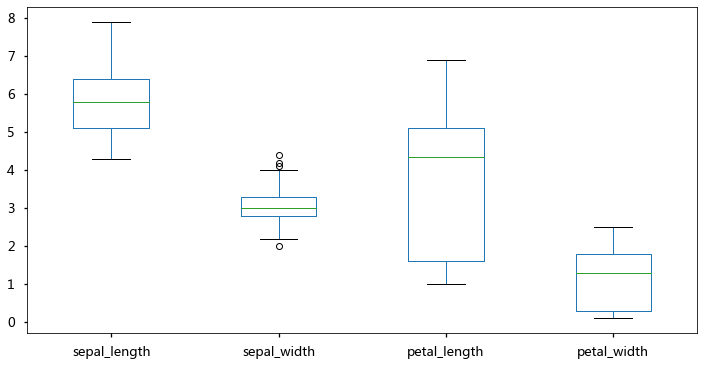

In [4]:
irisdf.plot(y=['sepal_length','sepal_width','petal_length','petal_width'],kind='box',figsize=(12,6))

- 各个属性取值基本可比，不需要进行标准化处理

##### 建立聚类模型

In [5]:
from sklearn.cluster import KMeans

In [6]:
irisKmeans = KMeans(n_clusters=3,random_state=0,n_jobs=-1)
irisKmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### 训练$K$均值聚类模型

```python
kmeans.fit(X)
```
- `X`：需要聚类的数据集

In [7]:
irisX = irisdf.iloc[:,:-1]
irisX.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
irisKmeans.fit(irisX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

##### 训练好的聚类模型的属性

- `labels_`：每个数据点（样本）的标签，即所属的簇

In [9]:
irisKmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

- `inertia_`：簇内误差平方和

In [10]:
irisKmeans.inertia_

78.94084142614602

#### 预测样本所属的距离最近的簇

```python
kmean.predict(X)
```
- 返回值：每个样本属于的簇的标签，是一个数组结构，形状为`[n_samples]`

In [11]:
irisLabel = irisKmeans.predict(irisX)
irisLabel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

#### 选择$K$值

> 随着$K$值的增大，簇内误差平方和（SSE）会降低

<dl class="row alert-info">
    <dt class="col-xl-4">肘部(elbow)法则<dt>
    <dd class="col-xl-8">识别SSE<strong>开始快速增大</strong>处的$K$值</dd>
</dl>

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

[[Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')]]

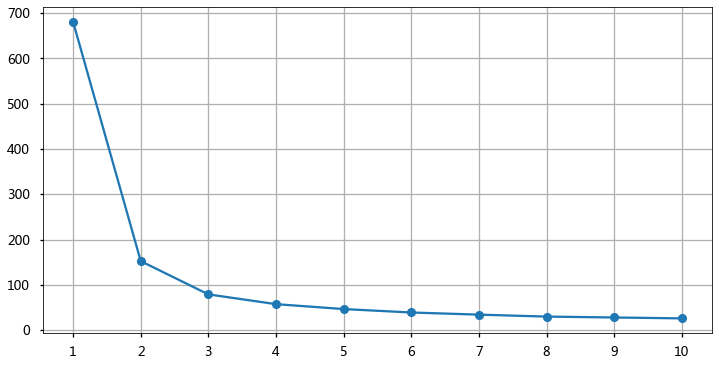

In [12]:
sse = []                ###记录每个k值对应的SSE
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=0,n_jobs=-1)
    km.fit(irisX)
    sse.append(km.inertia_)
ax = pd.Series(sse).plot(kind='line',figsize=(12,6),marker='o',grid=True,xticks=range(0,10))   #xticks：在哪些位置显示x轴刻度标签
ax.set(xticklabels=range(1,11))        # 改变x轴标签显示，默认是从0开始

- 当$K=3$的时候，SSE**开始快速增大**，所以选择3个簇

## 凝聚层次聚类

<dl class="row alert-danger">
    <dt class="col-md-4">树状图（dendrogram）</dt>
    <dd class="col-md-8">显示簇——子簇联系，以及簇合并或分裂的次序</dd>
</dl>

<img src="./img/clustering/dendrogram.png" width=80%>

> 生成层次聚类的方法

- 凝聚的（agglomerative）
    + 从每个数据点（样本）作为个体簇开始，每一步合并两个最接近的簇

- 分裂的（divisive）
    + 从包含所有数据点（样本）的簇开始，每一步分裂一个簇，直到仅剩下单点簇

### 基本算法

<center><img src="./img/clustering/agglomerativeCluster.svg" width=30%></center>

#### 近邻度矩阵 

<dl class="row alert-danger">
    <dt class="col-xl-4">近邻度矩阵</dt>
    <dd class="col-xl-8">由两两簇之间的距离或相似度构成的矩阵</dd>
</dl>

<p class="h3">计算下列数据的近邻度矩阵，假设每个样本构成一个簇</p>

In [13]:
labels = [f'ID_{i}' for i in range(5)]
egDf = pd.DataFrame(np.random.random_sample([5,3])*10,columns=['X','Y','Z'],index=labels)
egDf

,X,Y,Z
ID_0,2.666063,0.121414,1.713072
ID_1,2.168293,8.716449,7.753482
ID_2,2.703733,5.951136,1.730927
ID_3,8.215822,1.638099,9.973807
ID_4,4.049742,4.556296,3.039389


In [14]:
from scipy.spatial.distance import pdist,squareform

In [15]:
rowDist = pd.DataFrame(squareform(pdist(egDf,metric='euclidean')),columns=labels,index=labels)
rowDist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,10.517079,5.829871,10.066773,4.831341
ID_1,10.517079,0.000000,6.648671,9.571076,6.562728
ID_2,5.829871,6.648671,0.000000,10.813440,2.338673
ID_3,10.066773,9.571076,10.813440,0.000000,8.599898
ID_4,4.831341,6.562728,2.338673,8.599898,0.000000


```python
from scipy.spatial.distance import pdist,squareform
```
- `pdist(X, metric='euclidean')`：计算数据点两两之间的近邻度
- `squareform(X)`：将距离数组转换成矩阵形式

- 从近邻度矩阵中找到距离**最小**的两个簇，将其合并
- 计算合并的新簇与其他簇之间的距离，更新近邻度矩阵

#### 簇之间的近邻性度量

- 三种方法计算簇之间的距离
    + 单链接
    + 完全链接
    + 平均链接

##### 单链接（single linkage）

- 簇间距离等于两个簇包含的数据点（样本）之间的**最小**距离

<center><img src="./img/clustering/min.png" width=60%></center>

##### 完全链接（complete linkage）

- 簇间距离等于两个簇包含数据点（样本）之间的**最大**距离

<center><img src="./img/clustering/max.png" width=60%></center>

##### 平均链接（average linkage）

- 簇间距离等于两个簇包含数据点（样本）之间的**平均**距离

<center><img src="./img/clustering/gpavg.png" width=60%></center>

### 层次聚类的不足

- 一旦两个簇合并之后，该过程不可逆

- 缺乏全局目标函数

### 凝聚层次聚类的`Python`实现

```python
from scipy.cluster import hierarchy
hierarchy.linkage(y, method='single', metric='euclidean')
```
- `y`：利用`pdist()`函数得到的两两样本之间的距离数组，或者是原始数据
- `method`：簇之间的近邻性度量方法，可取的值包括`single`，`complete`，`average`等
- `metric`：选用的距离
- 返回值：`linkage`矩阵，层次聚类的结果

#### 读取数据并预处理

In [16]:
cityDf = pd.read_csv('./data/clustering/cities_10.csv',header=0)
cityDf.head()

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,Liaoning,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,Shandong,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,Hebei,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,Tianjin,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,Jiangsu,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7


In [17]:
cityDf.set_index(cityDf.pop('AREA'),inplace=True)
cityDf

,X1,X2,X3,X4,X5,X6,X7,X8,X9
AREA,,,,,,,,,
Liaoning,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
Shandong,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
Hebei,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
Tianjin,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
Jiangsu,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7
Shanghai,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0
Zhejiang,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9
Fujian,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9
Guangdong,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6


##### 绘制属性的箱型图，展示各个属性的取值范围

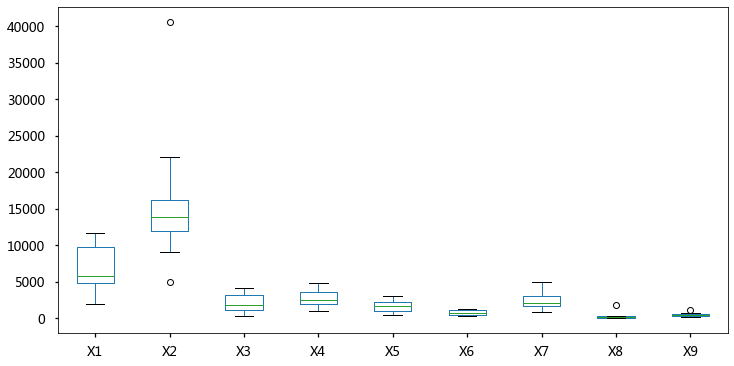

In [18]:
cityDf.plot(y=[f'X{i}' for i in range(1,10)],kind='box',figsize=(12,6))

- 各个属性取值范围差异较大，需要对数据进行标准化

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
cityScaler = StandardScaler()
cityX = cityScaler.fit_transform(cityDf)
cityX

array([[-0.37574772, -0.33589708, -0.57070001, -0.33180084, -0.4351153 ,
        -0.68608742, -0.13882664, -0.44958874, -0.36008526],
       [ 1.19924012, -0.48315182,  1.14473196,  0.98455823,  0.79990984,
         0.8650543 ,  0.66401891, -0.27809633,  0.34976628],
       [-0.18446517, -0.76485655, -0.54609356, -0.46884237, -0.63100796,
        -0.49108511, -0.39102534, -0.60224445, -0.68853914],
       [-1.43844228,  0.6481162 , -1.01716572, -1.40498973, -1.21233816,
        -1.16457327, -1.28376177, -0.46528598, -1.12861338],
       [ 1.2259343 , -0.18430174,  1.17200074,  1.08060301,  0.83964698,
         1.06721529,  0.6934899 ,  0.0625339 ,  0.46273553],
       [-0.39102805,  2.66204455,  0.09085021,  0.07932373,  0.3955559 ,
         0.03063913, -0.33286576, -0.06343649,  0.68294126],
       [ 0.3084029 ,  0.05150118,  0.22017521,  0.33489213,  0.80993934,
         1.17974966,  0.39938849, -0.11504119,  0.20374931],
       [-0.61584072, -0.28055447, -0.83620754, -0.66192379, -0

#### 建立凝聚层次模型

In [21]:
from scipy.cluster import hierarchy

In [22]:
cityAve = hierarchy.linkage(cityX,method='average',metric='euclidean')
cityAve

array([[ 1.        ,  4.        ,  0.52163185,  2.        ],
       [ 0.        ,  2.        ,  0.71496212,  2.        ],
       [ 7.        , 11.        ,  1.02790917,  3.        ],
       [ 6.        , 10.        ,  1.60180338,  3.        ],
       [ 3.        ,  9.        ,  1.91026168,  2.        ],
       [12.        , 14.        ,  2.18719558,  5.        ],
       [ 5.        , 13.        ,  3.6865092 ,  4.        ],
       [15.        , 16.        ,  4.35894698,  9.        ],
       [ 8.        , 17.        ,  6.58954454, 10.        ]])

In [23]:
pd.DataFrame(cityAve,columns=['行号','行号','距离','簇中包含的样本数量'],index=[f'簇{i}' for i in range(cityAve.shape[0])])

,行号,行号,距离,簇中包含的样本数量
簇0,1.0,4.0,0.521632,2.0
簇1,0.0,2.0,0.714962,2.0
簇2,7.0,11.0,1.027909,3.0
簇3,6.0,10.0,1.601803,3.0
簇4,3.0,9.0,1.910262,2.0
簇5,12.0,14.0,2.187196,5.0
簇6,5.0,13.0,3.686509,4.0
簇7,15.0,16.0,4.358947,9.0
簇8,8.0,17.0,6.589545,10.0


#### 树状图展示

```python
from scipy.cluster import hierarchy
hierarchy.dendrogram(Z, orientation='top', labels=None, ax=None)
```
- `Z`：`linkage`矩阵，层次聚类结果
- `orientation`：根结点的位置，可选`{"top", "bottom","left","right"}
- `labels`：原始数据点的标签，默认为`None`，即原始数据样本默认的行标签
- `ax`：`matplotlib Axes`对象

In [24]:
import matplotlib.pyplot as plt 

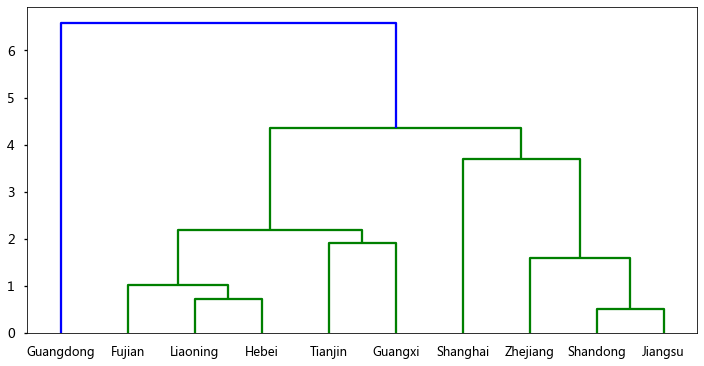

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
cityDn = hierarchy.dendrogram(cityAve,ax=ax,labels=cityDf.index)
plt.show()

#### 三种近邻性度量比较

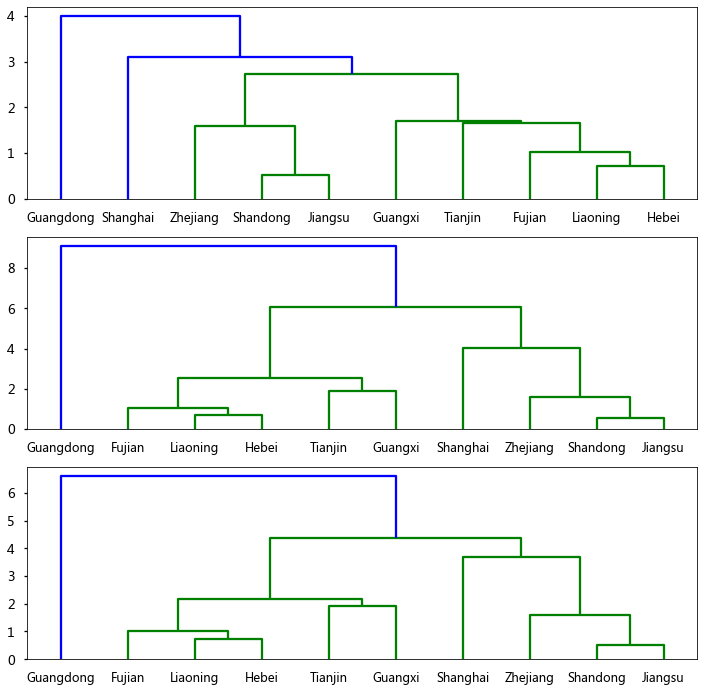

In [26]:
cityLinkages = []
fig,axes = plt.subplots(3,1,figsize=(12,12))
for idx,linkage in enumerate(['single','complete','average']):
    lnk = hierarchy.linkage(cityX,method=linkage,metric='euclidean')
    dn = hierarchy.dendrogram(lnk,ax=axes[idx],labels=cityDf.index)
plt.show()

#### `sklearn`中的凝聚层次聚类

```python
from sklearn.cluster import AgglomerativeClustering
AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, linkage=’ward’)
```
- `n_clusters`：`int`类型，簇的个数
- `affinity`：近邻度的度量，可以选择`'euclidean', 'manhattan', 'cosine'`等
- `linkage`：`str`类型，簇之间的链接类型，可以选择`'ward', 'complete', 'average', 'single'`

> 利用`AgglomerativeClustering`对凝聚层次聚类剪枝

##### 建立凝聚层次模型

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
cityAc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
cityAc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

##### 训练模型并预测样本所属的簇

In [29]:
cityLabels = cityAc.fit_predict(cityX)
cityLabels

array([0, 2, 0, 0, 2, 3, 2, 0, 1, 0])

In [30]:
cityDf['cluster']=cityLabels
cityDf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,cluster
AREA,,,,,,,,,,
Liaoning,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7,0
Shandong,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2,2
Hebei,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3,0
Tianjin,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8,0
Jiangsu,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7,2
Shanghai,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0,3
Zhejiang,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9,2
Fujian,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9,0
Guangdong,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6,1


## 基于密度的聚类

### 基本概念

> Density-Based Spatial Clustering of Applications with Noise（DBSCAN）

<dl class="row alert-danger">
    <dt class="col-xl-4">密度</dt>
    <dd class="col-xl-8">在一定半径（$Eps$）之内的数据点的个数</dd>
</dl>

##### 点分类

<dl class="row alert-danger">
    <dt class="col-xl-4">核心点(core point)</dt>
    <dd class="col-xl-8">该点的邻域（$Eps$）内包含的数据点的个数超过指定的阈值（$MinPts$）</dd>
</dl>

<dl class="row alert-info">
    <dt class="col-xl-4">边界点(border point)</dt>
    <dd class="col-xl-8">不是核心点，但是落在核心点的邻域($Eps$)内</dd>
</dl>

<dl class="row alert-success">
    <dt class="col-xl-4">噪声点(noise point)</dt>
    <dd class="col-xl-8">既非核心点也非边界点</dd>
</dl>

<center><img src="./img/clustering/densityPoints.gif" width=60%></center>

### 基本算法

1. 将所有点标记为核心点、边界点、噪声点
2. 删除噪声点
3. 连接距离在$Eps$之内的所有核心点
4. 每组连通的核心点形成一个簇
5. 将每个边界点指派到一个与之关联的核心点的簇中

### 优势

- 不像$K$均值方法对簇的形状有要求

- 不像$K$均值和层次聚类，需要将每个数据点（样本）归到一个簇中，可以去除噪声点

### 不足

- 不适用簇的密度变化较大的情况

<center><img src="./img/clustering/varyingDensity.GIF" width=40%></center>
明暗表明密度

簇A和B周围噪声的密度与簇C和D的密度一致

- 如果$Eps$过大，DBSCAN能够识别簇A和簇B，但是会将簇C和D识别为噪声

- 如果$Eps$过小，DBSCAN能够识别簇C和D，但是簇A和B以及它们周围的噪声将被识别为一个单一簇

### DBSCAN的`Python`实现

```python
from sklearn.cluster import DBSCAN
DBSCAN(eps=0.5, min_samples=5, metric='euclidean', n_jobs=None)
```
- `eps`：`float`类型，半径，两个数据点被认为属于同一个邻域的最大距离
- `min_samples`：`int`类型，核心点所在邻域所要包含的数据点的最小数量，核心点包括在内
- `metric`：距离的度量，可以选择`'minkowski','euclidean'`等

#### 建立DBSCAN模型

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
irisDB = DBSCAN(eps=1,min_samples=30,metric='euclidean',n_jobs=-1)

#### 训练模型并预测样本所属簇

In [33]:
irisLabelsDB = irisDB.fit_predict(irisX)
irisLabelsDB

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

- $-1$表示是噪声

## 聚类检验

<dl class="row alert-info">
    <dt class="col-md-4">聚类检验</dt>
    <dd class="col-md-8">检验聚类效果的优劣</dd>
</dl>

- 评估指标
    + 监督评估，利用外部信息（例如类别）来判断聚类效果的优劣
    + 非监督评估：利用数据本身的信息来判断

### 非监督评估

<dl class="row alert-info">
    <dt class="col-lg-4">凝聚度(cohesion)</dt>
    <dd class="col-lg-8">簇内数据点之间的密切程度</dd>
</dl>

- 可以是簇内各个数据点之间距离的均值

<dl class="row alert-danger">
    <dt class="col-lg-4">分离度(separation)</dt>
    <dd class="col-lg-8">某个簇不同于其他簇的程度</dd>
</dl>

- 不同簇的数据点之间的距离的均值

<center><img src="./img/clustering/cohesionSeparation.png" width=60%></center>

### 轮廓系数（silhouette coefficient）

<center><img src="./img/clustering/silhouette.png" width=40%></center>

$a_i$是第$i$个数据对象到所属簇中其他所有数据对象距离的平均值

计算第$i$个数据对象到给定簇中所有数据对象距离的平均值，所有$K-1$（$K$为簇的数量）个这样的值中的最小值为$b_i$

$$
s_i = \frac{b_i-a_i}{\max(a_i,b_i)}
$$

$s_i\in[-1,1]$，轮廓系数越接近1越好

#### `Python`实现

```python
from sklearn.metrics import silhouette_score
sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’)
```
- `X`：用于聚类的数据
- `labels`：用聚类技术计算的每个数据样本所属的簇
- 返回值：`float`类型，所有数据样本的轮廓系数的平均值

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(irisdf.iloc[:,:-1],irisKmeans.labels_)

0.5525919445499757